In [478]:
import pandas as pd

df = pd.read_csv("ecommerce_data.csv", sep=",", encoding = 'ISO-8859-1')

invoice_numbers_and_countries = dict()

for i, c in zip(list(df["InvoiceNo"]), list(df["Country"])):
    invoice_numbers_and_countries[i] = c

uniq_products = df["StockCode"].dropna().unique()
uniq_customers = df["CustomerID"].dropna().unique()

one_hot_df = pd.DataFrame([], columns=uniq_products)

def total_spend_to_product(row):
    return row["Quantity"] * row["UnitPrice"]
    
df["TotalProductPrice"] = df.apply(lambda row: total_spend_to_product(row), axis=1)

,85123A,71053,84406B,84029G,84029E,22752,21730,22633,22632,84879,...,23560,23576,23562,23561,23609,85179a,23617,90214U,47591b,23843


In [338]:
orders_by_country = df.drop_duplicates('InvoiceNo', keep='first')["Country"].value_counts()

orders_by_country

United Kingdom          23494
Germany                   603
France                    461
EIRE                      360
Belgium                   119
Spain                     105
Netherlands               101
Switzerland                74
Portugal                   71
Australia                  69
Italy                      55
Finland                    48
Sweden                     46
Norway                     40
Channel Islands            33
Japan                      28
Poland                     24
Denmark                    21
Cyprus                     20
Austria                    19
Hong Kong                  15
Unspecified                13
Malta                      10
Singapore                  10
Israel                      9
Iceland                     7
USA                         7
Canada                      6
Greece                      6
European Community          5
Czech Republic              5
Lithuania                   4
Bahrain                     4
United Ara

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


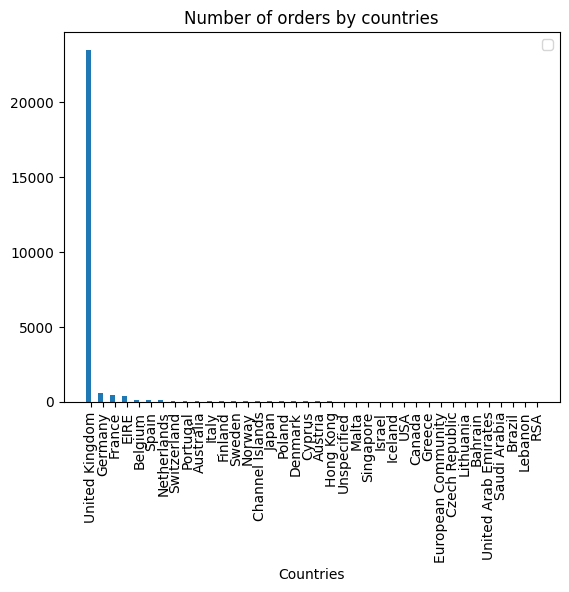

In [391]:
X_axis = np.arange(len(orders_by_country))

plt.bar(X_axis - 0.2, orders_by_country, 0.4, label = '')

plt.xticks(X_axis, list(orders_by_country.index))
plt.xticks(rotation=90)
plt.xlabel("Countries")
plt.title("Number of orders by countries")
plt.legend()
plt.show()

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/3583645664.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country_total_order_value = df.groupby(by="Country").sum().sort_values(by="TotalProductPrice", ascending=False)["TotalProductPrice"].astype(int)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


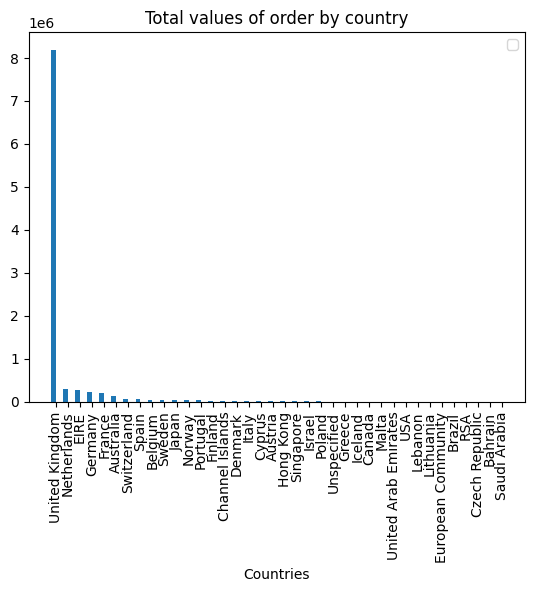

Country
United Kingdom          8187806
Netherlands              284661
EIRE                     263276
Germany                  221698
France                   197403
Australia                137077
Switzerland               56385
Spain                     54774
Belgium                   40910
Sweden                    36595
Japan                     35340
Norway                    35163
Portugal                  29367
Finland                   22326
Channel Islands           20086
Denmark                   18768
Italy                     16890
Cyprus                    12946
Austria                   10154
Hong Kong                 10117
Singapore                  9120
Israel                     7907
Poland                     7213
Unspecified                4749
Greece                     4710
Iceland                    4310
Canada                     3666
Malta                      2505
United Arab Emirates       1902
USA                        1730
Lebanon                    1693


In [398]:
country_total_order_value = df.groupby(by="Country").sum().sort_values(by="TotalProductPrice", ascending=False)["TotalProductPrice"].astype(int)

plt.bar(X_axis - 0.2, country_total_order_value, 0.4, label = '')

plt.xticks(X_axis, list(country_total_order_value.index))
plt.xticks(rotation=90)
plt.xlabel("Countries")
plt.title("Total values of order by country")
plt.legend()
plt.show()

country_total_order_value

In [420]:
data = []
one_hot_index = []
countries = []

for i, c in enumerate(uniq_customers):
    p_codes = df[df["CustomerID"] == c]["StockCode"].unique()
    country = df[df["CustomerID"] == c]["Country"].unique()
    countries.append(country[0])
    t_list = list(map(lambda x: x in p_codes, uniq_products))
    one_hot_row = [int(val) for val in t_list]
    data.append(one_hot_row)
    one_hot_index.append(c)

In [479]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

one_hot_df = pd.DataFrame(data, columns=uniq_products, index=one_hot_index)

plot_2_pca = PCA(n_components=2).fit_transform(one_hot_df)

one_hot_df

,85123A,71053,84406B,84029G,84029E,22752,21730,22633,22632,84879,...,23560,23576,23562,23561,23609,85179a,23617,90214U,47591b,23843
17850.0,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
13047.0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
12583.0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
13748.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15100.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13436.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15520.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13298.0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14569.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [519]:
def get_color(country):
    if (country == "Netherlands"):
        return "red"
    else: 
        return "white"

colors_country = [get_color(c) for c in countries]

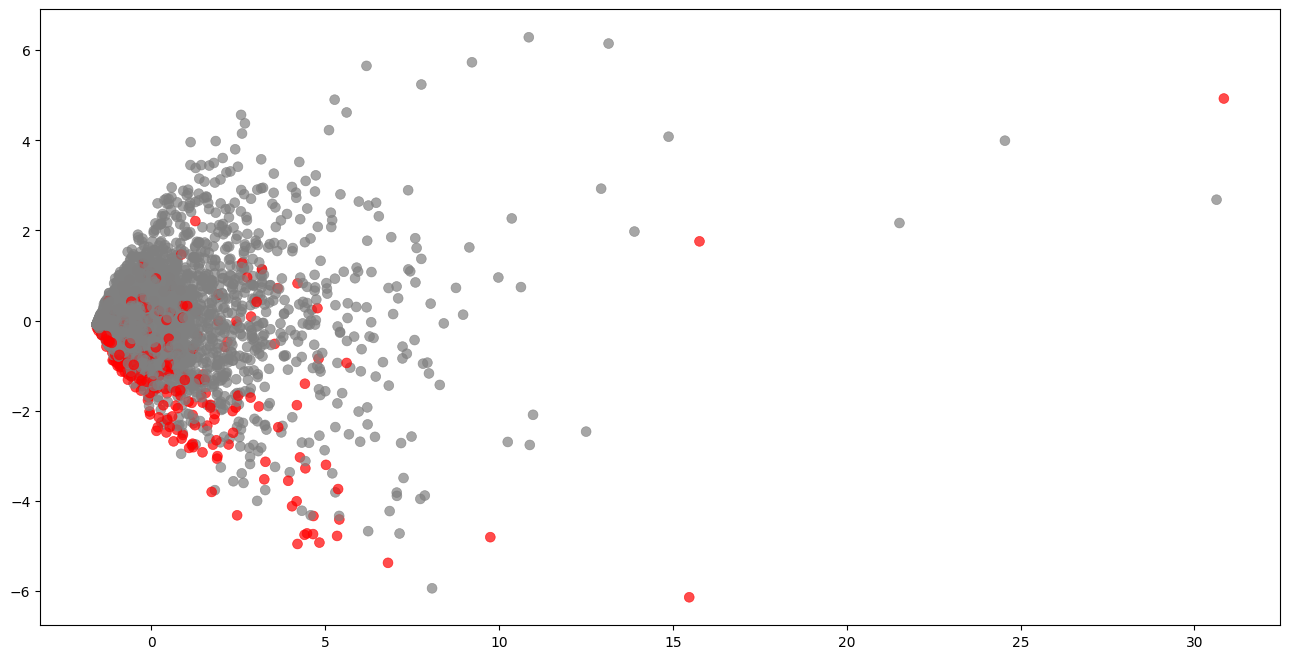

In [463]:
from sklearn.preprocessing import StandardScaler

# scaled = StandardScaler().fit(plot_svd).transform(plot_svd)

fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(plot_2_pca[:, 0], plot_2_pca[:, 1], s=50,
               linewidths=0.5, alpha=0.7, c=colors)

array([[ 0.69913163, -0.71385449],
       [ 2.89924995, -1.03241477],
       [ 3.02142484,  2.90774233],
       ...,
       [ 0.06955646, -0.01515351],
       [ 0.13833631,  0.01059556],
       [ 1.08891324,  0.90408328]])

In [62]:
def total_spend_to_product(row):
    return row["Quantity"] * row["UnitPrice"]
    
df["TotalProductPrice"] = df.apply(lambda row: total_spend_to_product(row), axis=1)

# df.drop(columns=["total_product_price"])

per_product_in_order = df.groupby("Country").mean().drop(["UnitPrice", "CustomerID"], axis=1).sort_values("Quantity", ascending=False)

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/1390806938.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  per_product_in_order = df.groupby("Country").mean().drop(["UnitPrice", "CustomerID"], axis=1).sort_values("Quantity", ascending=False)


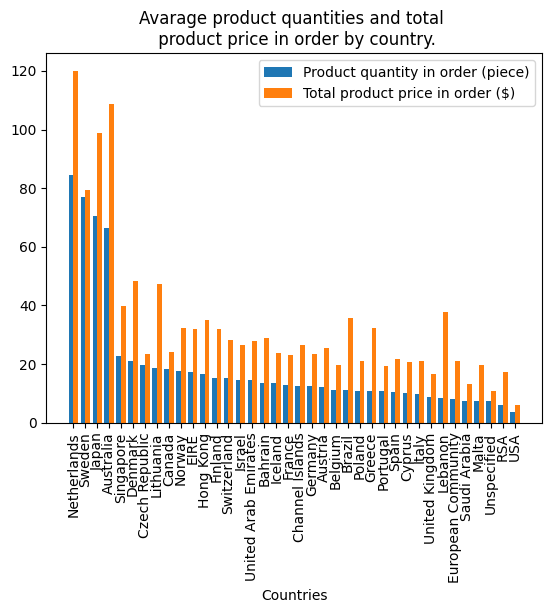

In [63]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

#fig, ax = plt.subplots()  # Create a figure containing a single axes.
#ax.plot(["Quantity"], per_product_in_order["TotalProductPrice"]);
#ax.set_xlabel()
#ax.set_ylabel('Total Product Price')

X_axis = np.arange(len(per_product_in_order.index))

plt.bar(X_axis - 0.2, per_product_in_order['Quantity'], 0.4, label = 'Product quantity in order (piece)')
plt.bar(X_axis + 0.2, per_product_in_order['TotalProductPrice'], 0.4, label = 'Total product price in order ($)')
  
plt.xticks(X_axis, per_product_in_order.index)
plt.xticks(rotation=90)
plt.xlabel("Countries")
plt.title("Avarage product quantities and total \n product price in order by country.")
plt.legend()
plt.show()

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2883317829.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  invoice_totals = df.groupby("InvoiceNo").sum().drop(["UnitPrice", "CustomerID"], axis=1)
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2883317829.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_order_value = invoice_totals.groupby("Country").mean().drop("Quantity", axis=1).sort_values("TotalProductPrice", ascending=False)


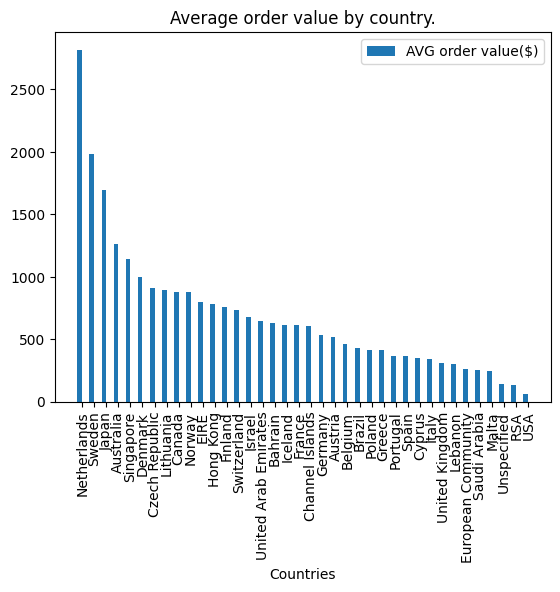

In [344]:
invoice_totals = df.groupby("InvoiceNo").sum().drop(["UnitPrice", "CustomerID"], axis=1)

invoice_totals["InvoiceNo"] = invoice_totals.index

invoice_totals.reset_index(drop=True, inplace=True)

def find_country_from_invocie_num(row):
    key = row["InvoiceNo"]
    return invoice_numbers_and_countries[str(key)]

invoice_totals["Country"] = invoice_totals.apply(lambda row: find_country_from_invocie_num(row), axis=1)

avg_order_value = invoice_totals.groupby("Country").mean().drop("Quantity", axis=1).sort_values("TotalProductPrice", ascending=False)

avg_order_value["AvgOrderValue"] = avg_order_value["TotalProductPrice"]
avg_order_value = avg_order_value.drop(columns=["TotalProductPrice"], axis=0)

X_axis = np.arange(len(avg_order_value.index))

plt.bar(X_axis - 0.2, avg_order_value["AvgOrderValue"], 0.4, label = 'AVG order value($)')
  
plt.xticks(X_axis, per_product_in_order.index)
plt.xticks(rotation=90)
plt.xlabel("Countries")
plt.title("Average order value by country.")
plt.legend()
plt.show()

In [722]:
unique_orders = df.drop_duplicates('InvoiceNo', keep='first')["CustomerID"].value_counts()

customers_multiple_orders = unique_orders[unique_orders.values > 1]
customers_only_one_order = unique_orders[unique_orders.values <= 1]

Y_multiple_orders = [] 

for i in one_hot_df.iterrows():
    if(i[0] in customers_multiple_orders):
        Y_multiple_orders.append(1)
    else:
        Y_multiple_orders.append(0)

In [723]:
Y_countries = []

for c in countries:
    if c == "United Kingdom":
        Y_countries.append(1)
    else: 
        Y_countries.append(0)

Y_countries.count(1)/len(Y_countries)

0.903476669716377

In [724]:
print(len(customers_only_one_order)/len(Y_multiple_orders))
print(len(customers_multiple_orders)/len(Y_multiple_orders))

0.30032021957913996
0.69967978042086


In [493]:
from mpl_toolkits import mplot3d
from sklearn.manifold import TSNE

tsne_2 = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=10).fit_transform(one_hot_df)

tsne_2

array([[-17.896027 ,   1.7298967],
       [-14.530641 ,  31.653698 ],
       [ 10.184339 , -23.093628 ],
       ...,
       [ 26.137901 ,   9.733777 ],
       [-63.8057   , -10.89469  ],
       [  5.970161 , -25.920837 ]], dtype=float32)

In [644]:
is_mult = [x == 1 for x in Y_multiple_orders]
is_not = [x == 0 for x in Y_multiple_orders]

is_uk = [x == "United Kingdom" for x in countries]
is_not_uk = [x != "United Kingdom" for x in countries]

In [567]:
import umap

plot_50_pca = PCA(n_components=50).fit_transform(one_hot_df)

trans = umap.UMAP(n_neighbors=2, random_state=42).fit_transform(plot_50_pca)

In [559]:
#trans[is_uk]
#trans[is_not_uk]

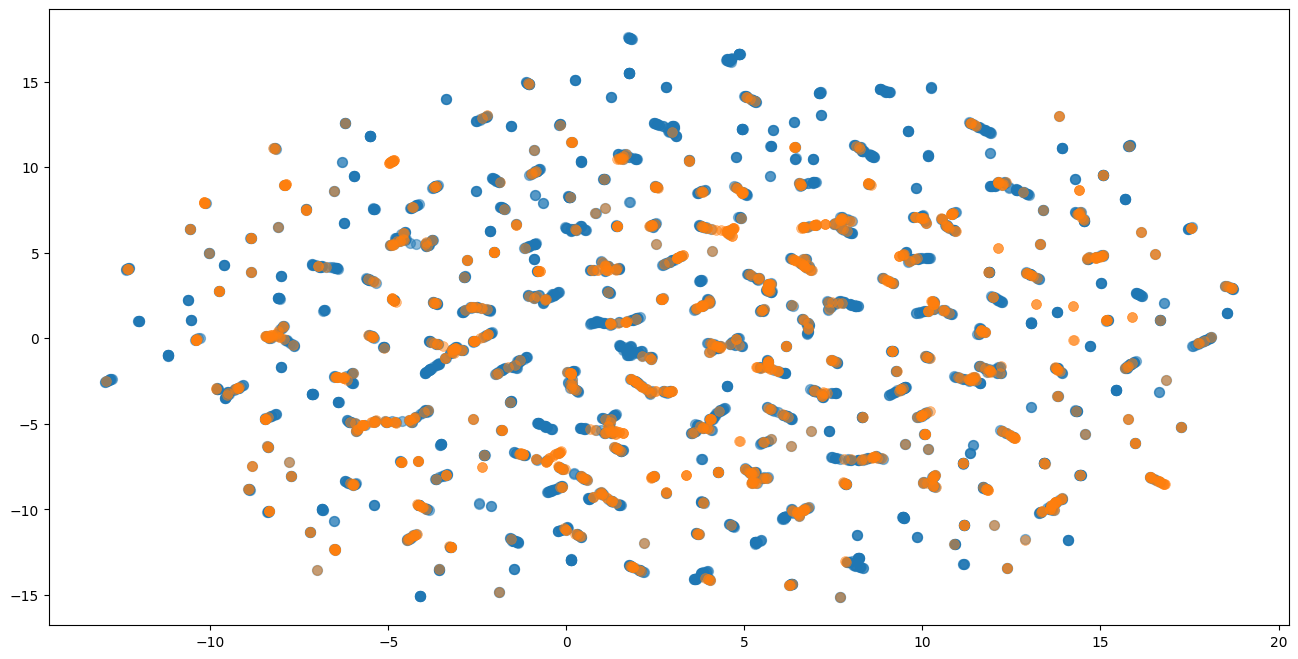

In [636]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.scatter(trans[is_mult][:,0], trans[is_mult][:, 1], s=50,linewidths=1, alpha=0.5)
ax.scatter(trans[is_not][:,0], trans[is_not][:, 1], s=50,linewidths=0.5, alpha=0.5)

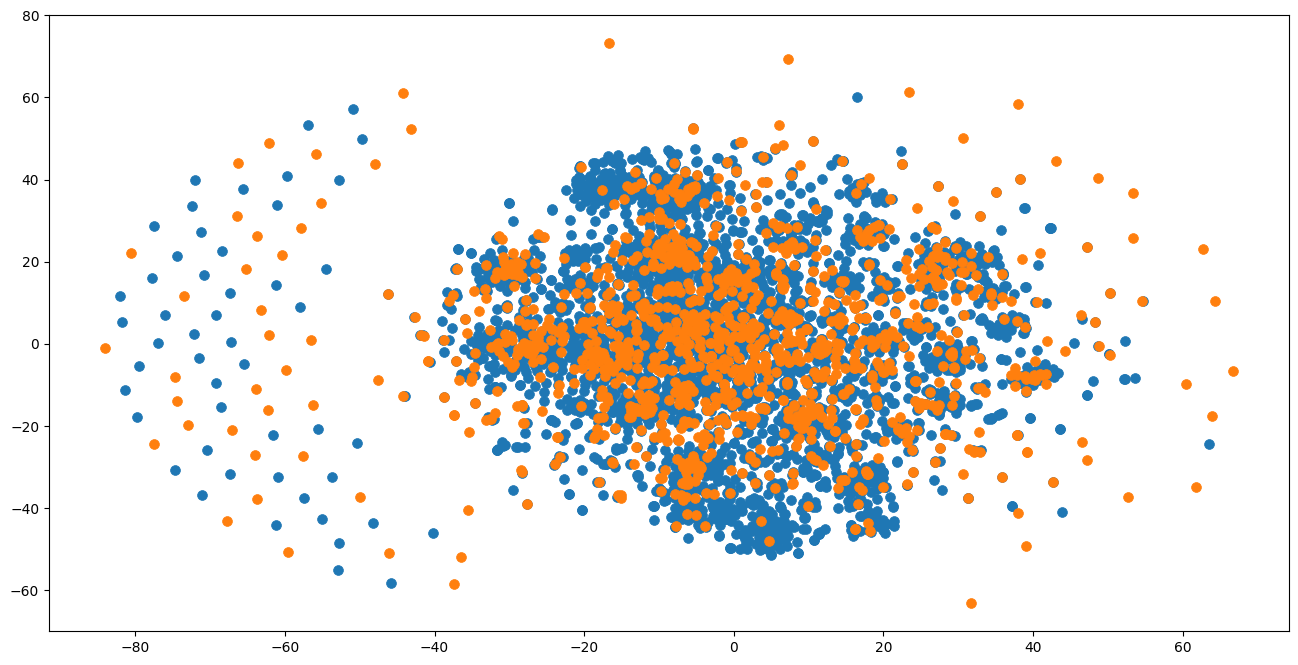

In [635]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.scatter(tsne_2[is_mult][:, 0], tsne_2[is_mult][:, 1], s=50,linewidths=0.5, alpha=1)
ax.scatter(tsne_2[is_not][:, 0], tsne_2[is_not][:, 1], s=50,linewidths=0.5, alpha=1)

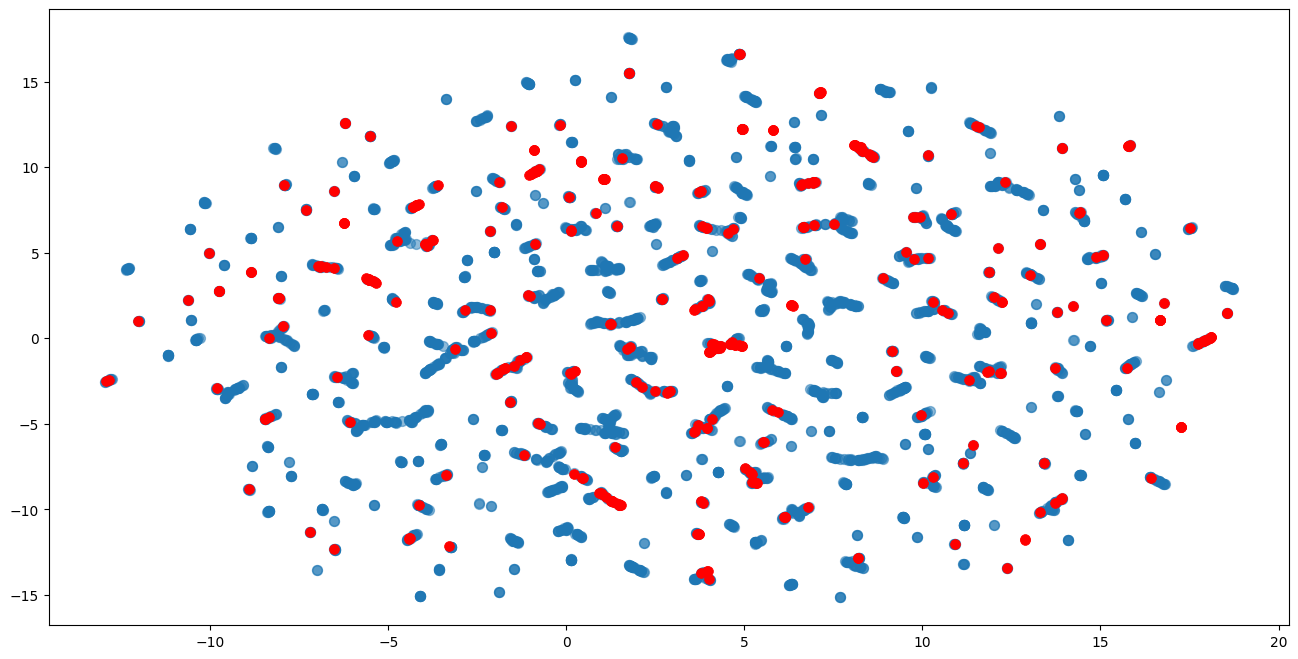

In [582]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.scatter(trans[is_uk][:,0], trans[is_uk][:, 1], s=50,linewidths=1, alpha=0.5)
ax.scatter(trans[is_not_uk][:,0], trans[is_not_uk][:, 1], s=50,linewidths=0.5, alpha=1, color="red")

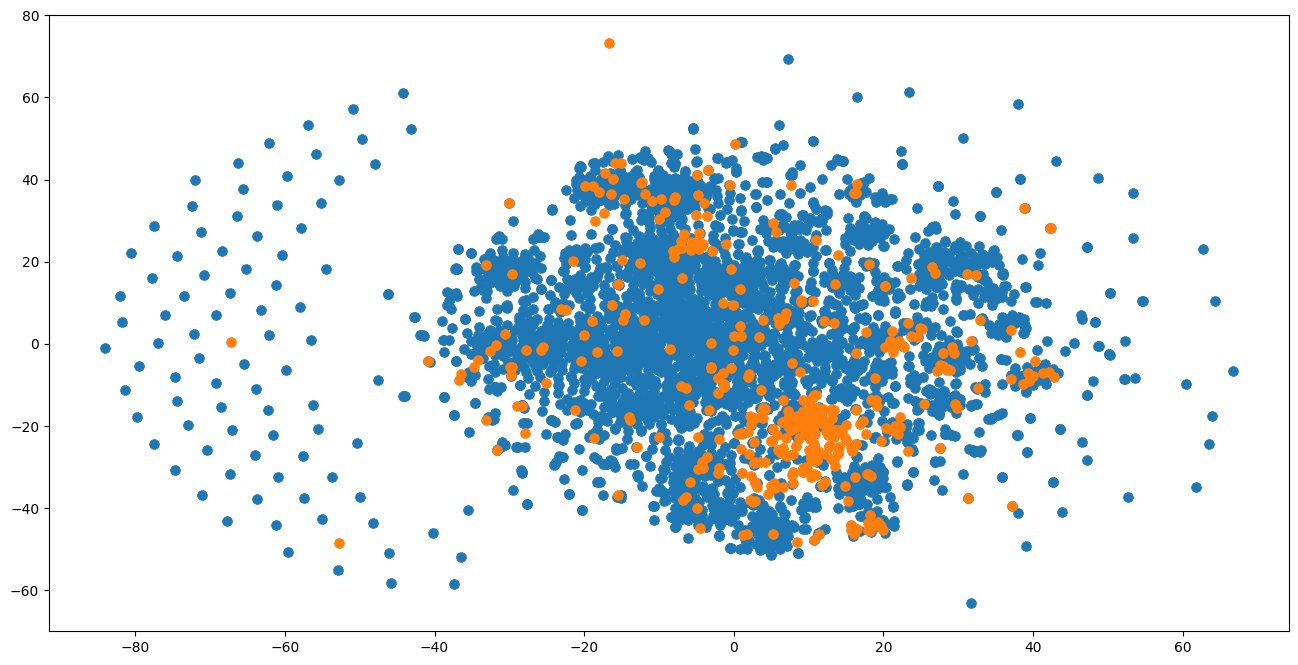

In [645]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.scatter(tsne_2[is_uk][:, 0], tsne_2[is_uk][:, 1], s=50,linewidths=0.5, alpha=1)
ax.scatter(tsne_2[is_not_uk][:, 0], tsne_2[is_not_uk][:, 1], s=50,linewidths=0.5, alpha=1)

In [756]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(one_hot_df, Y_multiple_orders, test_size=0.3)

In [763]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7027439024390244

In [804]:
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(one_hot_df, Y_multiple_orders, test_size=0.3, random_state=42)

clf = svm.SVC(random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7728658536585366

In [768]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1 ,max_depth = 20, alpha = 10, n_estimators = 1000)
xg_reg.fit(X_train,y_train)

y_predict = xg_reg.predict(X_test)


In [730]:
# pd.DataFrame(xg_reg.evals_result()['validation_0']['rmse'], columns=['rmse']).plot()

XGBoostError: No evaluation result, `eval_set` is not used during training.

In [767]:
accuracy_score(y_test, y_predict>0.5)

0.743140243902439

In [816]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='sgd', alpha=0.01, hidden_layer_sizes=(20, 5), random_state=1)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7591463414634146

In [867]:
total_spend_data = []

def find_total_product_prices_for_customer(customer_id):
    row = []
    t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
    customer_p_codes = [i[0] for i in t.iterrows()]
    for p_code in uniq_products:
        if(p_code in customer_p_codes):
            try:
                total_spend = t[t.index == p_code]["TotalProductPrice"]
                row.append(total_spend[0] if total_spend[0] > 0 else 0)
            except:
                print("err", total_spend)
        else:
            row.append(0)
    return row
    

for i, c in enumerate(uniq_customers):
    total_spend_data.append(find_total_product_prices_for_customer(c))
    


/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df[df["CustomerID"] == customer_id].groupby("StockCode").sum()
/var/folders/vl/yjf_tn8x29j8_0jv0f7hvngm0000gn/T/ipykernel_47113/2587631053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False.

ValueError: Length of values (4372) does not match length of index (541909)

In [883]:
#from sklearn.preprocessing import StandardScaler

#scaled = StandardScaler().fit_transform(total_spend_data)

total_spend_df = pd.DataFrame(total_spend_data, columns=uniq_products, index=one_hot_index)

In [884]:
total_spend_df

,85123A,71053,84406B,84029G,84029E,22752,21730,22633,22632,84879,...,23560,23576,23562,23561,23609,85179a,23617,90214U,47591b,23843
17850.0,315.90,413.58,297.0,372.9,352.56,321.3,432.8,199.8,188.7,0.00,...,0.0,0.0,0.00,0.0,0,0,0,0.0,0,0
13047.0,67.85,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,54.08,...,0.0,0.0,0.00,0.0,0,0,0,0.0,0,0
12583.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,17.34,0.0,0,0,0,0.0,0,0
13748.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.00,0.0,0,0,0,0.0,0,0
15100.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.00,0.0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13436.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.00,0.0,0,0,0,0.0,0,0
15520.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.00,0.0,0,0,0,0.0,0,0
13298.0,0.00,0.00,0.0,90.0,0.00,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.00,0.0,0,0,0,0.0,0,0
14569.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.00,0.0,0,0,0,0.0,0,0


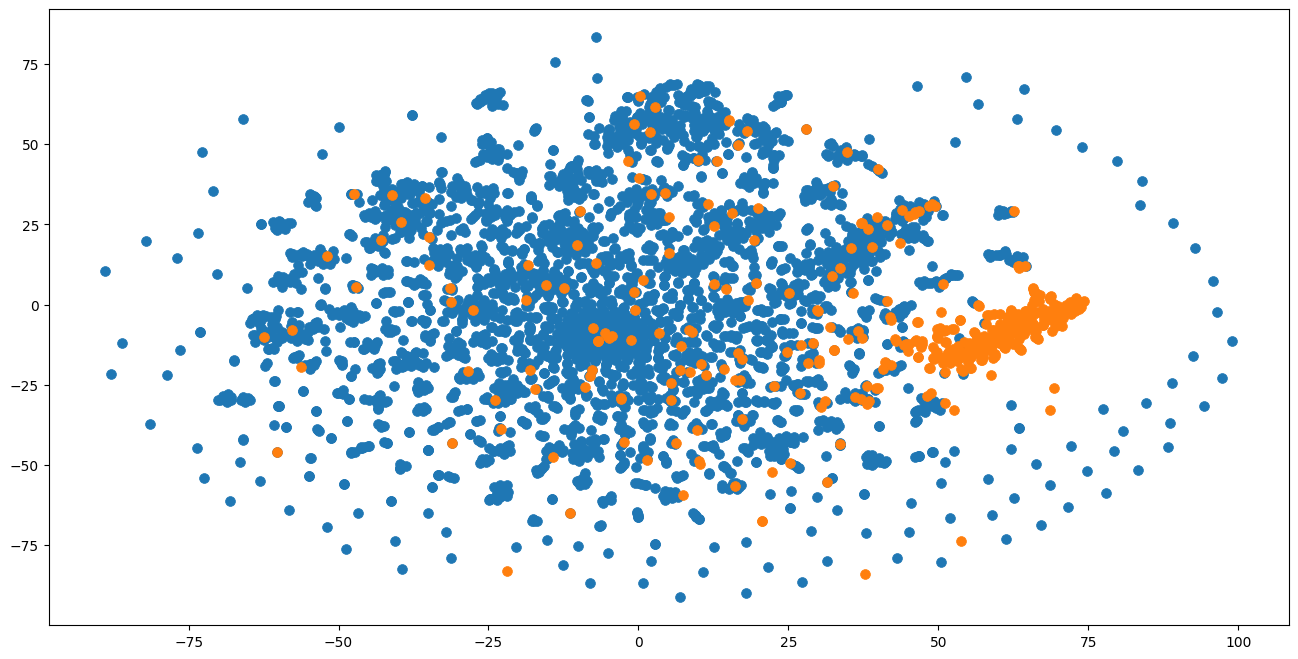

In [892]:
fig, ax = plt.subplots(figsize=(16, 8))

tsne_2_total_spend = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=10).fit_transform(total_spend_df)

ax.scatter(tsne_2_total_spend[is_uk][:, 0], tsne_2_total_spend[is_uk][:, 1], s=50,linewidths=0.5, alpha=1)
ax.scatter(tsne_2_total_spend[is_not_uk][:, 0], tsne_2_total_spend[is_not_uk][:, 1], s=50,linewidths=0.5, alpha=1)



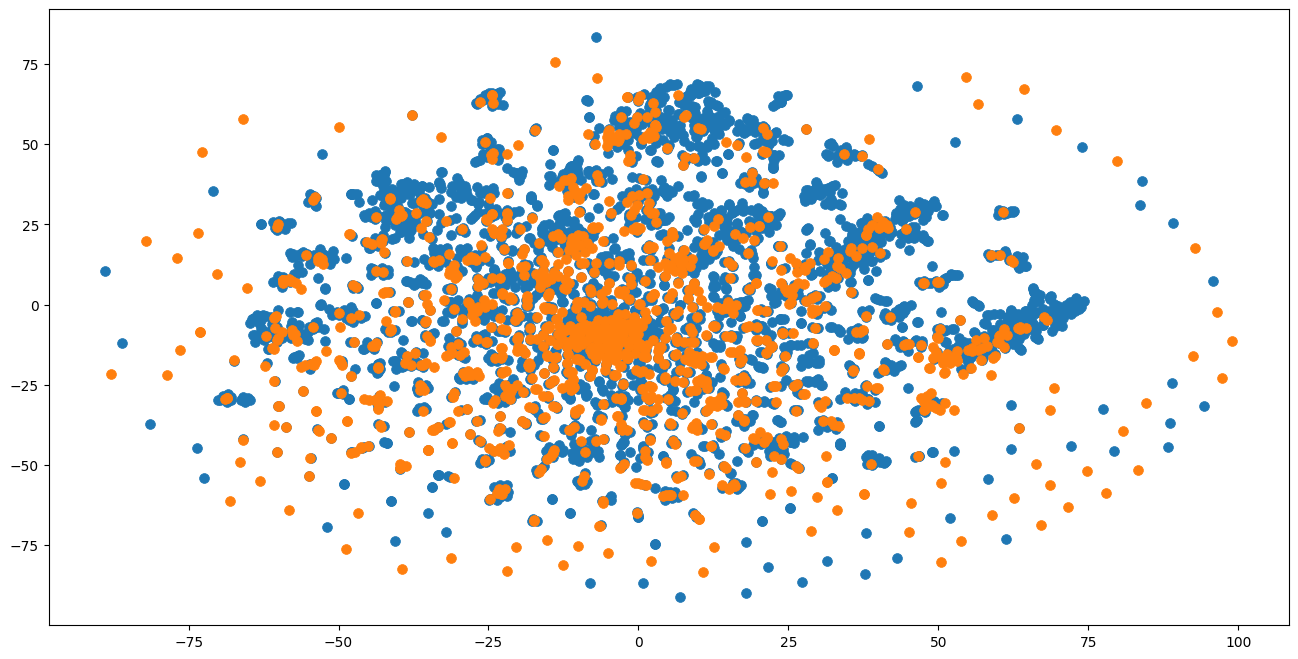

In [894]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.scatter(tsne_2_total_spend[is_mult][:, 0], tsne_2_total_spend[is_mult][:, 1], s=50,linewidths=0.5, alpha=1)
ax.scatter(tsne_2_total_spend[is_not][:, 0], tsne_2_total_spend[is_not][:, 1], s=50,linewidths=0.5, alpha=1)